#Q1. Problem Statement:DBSCAN Clustering
#Q2. Problem Statement: Fuzzy C Means Clustering

In [205]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
c1 = pd.read_csv('Mall_Customers.csv') 
c1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot:>

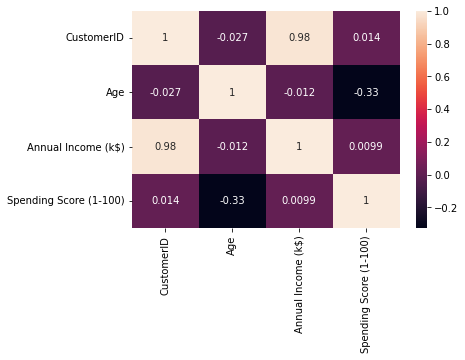

In [206]:
import seaborn as sb
c2=sb.heatmap(c1.corr(),annot=True)
c2

In [207]:
c2 = c1.drop(['CustomerID'], axis=1)
c2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [208]:
c3= pd.get_dummies(data=c2, columns=['Gender'])
c3

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [209]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=12.5, min_samples=4).fit(c3)
c4= c3.copy()
c4.loc[:,'Cluster']=clustering.labels_
c4

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,-1
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,-1
196,45,126,28,1,0,-1
197,32,126,74,0,1,-1
198,32,137,18,0,1,-1


In [210]:
new = c4.groupby('Cluster').size().to_frame()
new.columns = ["DBSCAN_size"]
new


,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


Text(0.5, 1.0, 'How annual income corresponds to the spending rate')

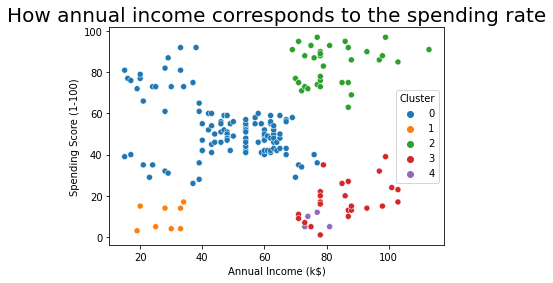

In [224]:
import seaborn as sns
c5 = c4[c4['Cluster']!=-1]
ax=sns.scatterplot(data=c5, x="Annual Income (k$)", y="Spending Score (1-100)",hue='Cluster',palette = 'tab10')
ax.set_title('How annual income corresponds to the spending rate',fontsize =20)

# Q2. Problem Statement: Fuzzy C Means Clustering

In [212]:
z2=c3.to_numpy()
z2

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

In [213]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [214]:
fcm = FCM(n_clusters=2)
fcm.fit(z2)

In [215]:
z5=fcm.centers

Text(0.5, 1.0, 'Analyzing How Age of the Customers Corresponding to the Spending rate')

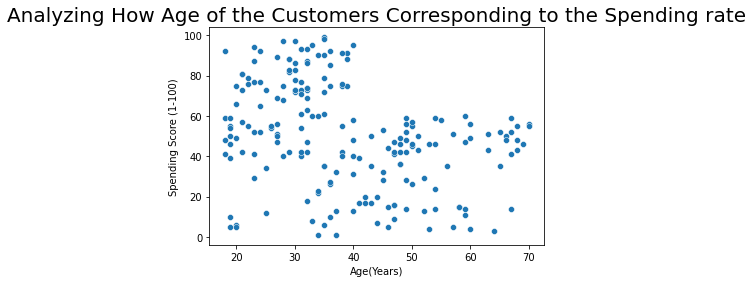

In [216]:
ax=sns.scatterplot(z2[:,0],z2[:,2])
ax.set(xlabel='Age(Years)', ylabel='Spending Score (1-100)')
ax.set_title('Analyzing How Age of the Customers Corresponding to the Spending rate',fontsize =20)

In [203]:
fcm.predict(z2)


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

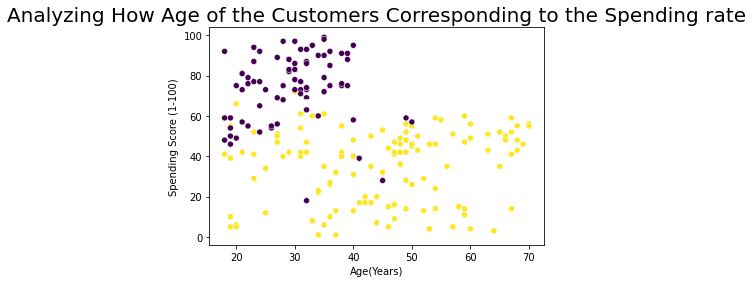

In [222]:
z5 = fcm.centers
c = fcm.predict(z2)
ax=sns.scatterplot(z2[:,0],z2[:,2],c=fcm.predict(z2) )
ax=ax.scatter(z5[:,0],z5[:,2],marker='+',s=500,c='w')
plt.xlabel("Age(Years)")
plt.ylabel("Spending Score (1-100)")
plt.title('Analyzing How Age of the Customers Corresponding to the Spending rate',fontsize =20)
plt.show()